# 20_newspaper Dataset Text Classification

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from sklearn.model_selection import train_test_split
import re
from nltk.corpus import stopwords
import operator
from os import listdir
from os.path import isfile, join
import string
import copy
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [278]:
dir_path = "20_newsgroups"  # path to directory
# please Ensure that the this ipynb and this directory are in same directory 
folders = [fo for fo in listdir(dir_path)]
# folders now contains all the folders present in the directory 20_newsgroup

In [279]:
# We import Stopwords which are all the words which are commmon to general englishh and don't provide us with any significant conclusion
# example - Pronouns, conjuctions, Modals etc.
stopWords=stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [280]:
stopWords.extend(list(string.punctuation))
# Including Punctuation in our stopwords

In [281]:
data = dict()
content = dict()    # This will contain all our Words which constitute the words we will look for

for foldername in folders:
    
    data[foldername] = []

    for filename in listdir(join(dir_path, foldername)):
        with open(join(dir_path, foldername , filename), 'r' , errors='ignore') as f:
            text = f.read()
            # text = text.decode('utf16')
            text = text.lower()
            text = re.sub(r"[^a-z]", ' ', text) # Ignoring all the text which don't have alphabets in them

            curr_wordList=text.split()  # goves us the list of all meaningful words in the current File
            data[foldername].append(curr_wordList)
            
            for word in curr_wordList:
                if word in content:
                    content[word] += 1      #Adding to the Frequency of the given word
                
                elif word not in stopWords: # If this word is new so we will make a new entry for it
                    content[word] = 1


content=sorted(content.items(),key=operator.itemgetter(1),reverse=True) #Sorting the Content


In [282]:
sampleSize = 500    # Feature Set will have these many Features, More the Features more the Accuracy

In [283]:
type(content)

list

In [284]:
feature_set=[]

for e in content:
    feature_set.append(e[0])

feature_set=feature_set[0:sampleSize]   #taking only the 

feature_set

['edu',
 'ax',
 'cmu',
 'com',
 'cs',
 'apr',
 'news',
 'srv',
 'cantaloupe',
 'net',
 'c',
 'message',
 'subject',
 'x',
 'lines',
 'id',
 'date',
 'newsgroups',
 'path',
 'organization',
 'state',
 'gmt',
 'would',
 'ohio',
 'one',
 'r',
 'writes',
 'article',
 'comp',
 'w',
 'references',
 'b',
 'talk',
 'u',
 'misc',
 'p',
 'ca',
 'q',
 'f',
 'ans',
 'sender',
 'g',
 'e',
 'howland',
 'reston',
 'v',
 'people',
 'like',
 'university',
 'posting',
 'nntp',
 'cc',
 'mps',
 'know',
 'may',
 'host',
 'sci',
 'get',
 'n',
 'k',
 'think',
 'usenet',
 'zaphod',
 'l',
 'alt',
 'politics',
 'windows',
 'also',
 'h',
 'time',
 'j',
 'rutgers',
 'use',
 'harvard',
 'eng',
 'near',
 'new',
 'z',
 'us',
 'rec',
 'good',
 'system',
 'crabapple',
 'noc',
 'sei',
 'well',
 'soc',
 'could',
 'das',
 'xref',
 'cis',
 'even',
 'see',
 'europa',
 'gtefsd',
 'ece',
 'god',
 'uunet',
 'world',
 'religion',
 'fs',
 'way',
 'uk',
 'org',
 'two',
 'say',
 'make',
 'many',
 'christian',
 'much',
 'first',
 

In [285]:
def to_dataframe(cols):

    Data = pd.DataFrame(columns = cols)
    label = []
    for foldername in folders:
        for filename in data[foldername]:
            
            label.append(foldername)
            Data.loc[len(Data)] = np.zeros(len(cols))
            
            for text in filename:
                for word in text.split():
                    if word in cols:
                        Data.loc[len(Data)-1,word] = Data.loc[len(Data)-1,word] + 1
        
    Data['label']=label
    return Data

    

In [286]:
Data = to_dataframe(feature_set)

In [287]:
Data.head()

,edu,ax,cmu,com,cs,apr,news,srv,cantaloupe,net,...,cb,machine,canada,claim,earth,robert,stratus,live,feel,label
0,10.0,0.0,5.0,1.0,3.0,1.0,4.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,alt.atheism
1,5.0,0.0,4.0,1.0,3.0,1.0,3.0,3.0,2.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,9.0,alt.atheism
2,7.0,0.0,3.0,3.0,4.0,1.0,2.0,2.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,alt.atheism
3,6.0,0.0,4.0,1.0,3.0,1.0,1.0,3.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alt.atheism
4,4.0,0.0,4.0,10.0,3.0,4.0,0.0,3.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,alt.atheism


In [288]:
nonlabelData = Data.drop(['label'],axis=1).values   #Seperate L=Non-label Data
labels = Data['label'].values   # seperate labels

X_train,X_test,Y_train,Y_test=train_test_split(nonlabelData,labels,random_state=0,test_size=0.3)

In [289]:
Data.to_csv('data.csv') # Just in case code takes extra time we can use up this data from the csv file 

### Getting Priors

<BarContainer object of 20 artists>

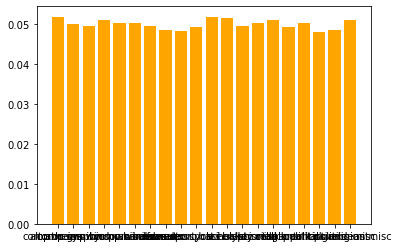

In [290]:
priors = dict() # Priors of all the newspapers will be stored along theor names.

for foldername in folders:
    val = len(Y_train[Y_train == foldername])
    priors[foldername] = val / len(Y_train)

plt.bar(priors.keys(),priors.values(),color='orange')

In [291]:
priors.values()

dict_values([0.051868257483746516, 0.049939272701293135, 0.04943916553547189, 0.05115381867543045, 0.05022504822461956, 0.05036793598628277, 0.0495820532971351, 0.048581838965492605, 0.04829606344216618, 0.04936772165464028, 0.051868257483746516, 0.05158248196042009, 0.049510609416303496, 0.05022504822461956, 0.05093948703293563, 0.04922483389297707, 0.05029649210545117, 0.04793884403800815, 0.04865328284632421, 0.05093948703293563])

### Getting Class Conditionals

In [292]:
#Calculating the Class Conditionals

classConditional = pd.DataFrame(columns=feature_set)

for i,foldername in enumerate(folders):

    classConditional.loc[len(classConditional)] = np.zeros(len(feature_set))
    for feature in feature_set:

        num = Data[feature][Data['label']==foldername].sum()
        denom = len(Data[Data['label']==foldername])
        
        classConditional[feature][i] = ( num + 1) / ( denom + len(feature_set))   #LaPLacian Smoothing as taught
# Each Column needs to be divided by its net sum to normalize it
classConditional = classConditional.div(classConditional.sum( axis = 0), axis = 1)
# This ensures that now each feature has a net sum of 1



In [293]:
classConditional

,edu,ax,cmu,com,cs,apr,news,srv,cantaloupe,net,...,hope,cb,machine,canada,claim,earth,robert,stratus,live,feel
0,0.056935,0.000016,0.052200,0.064111,0.053778,0.049854,0.055730,0.050114,0.048599,0.055040,...,0.057638,0.046118,0.004619,0.011556,0.207831,0.109883,0.087593,0.013188,0.058307,0.073418
1,0.045603,0.000048,0.048634,0.035303,0.051706,0.039820,0.049375,0.049898,0.050747,0.053668,...,0.045342,0.016910,0.083140,0.059319,0.013134,0.037917,0.075191,0.004655,0.013994,0.028899
2,0.046913,0.998690,0.046765,0.040668,0.048554,0.036178,0.048771,0.049404,0.050632,0.052413,...,0.055333,0.072252,0.106235,0.046993,0.008499,0.003869,0.041084,0.001552,0.015548,0.019526
3,0.042579,0.000096,0.047813,0.052014,0.047276,0.045078,0.041553,0.048725,0.044149,0.051159,...,0.026129,0.038432,0.117013,0.033126,0.016225,0.008512,0.088368,0.005431,0.010106,0.017183
4,0.050040,0.000032,0.050846,0.030848,0.044433,0.043149,0.048397,0.048601,0.043536,0.047631,...,0.031509,0.008455,0.127790,0.031586,0.006181,0.003095,0.025580,0.003879,0.007774,0.017183
5,0.039866,0.000192,0.047642,0.049756,0.049348,0.033887,0.050238,0.047860,0.049213,0.053864,...,0.031509,0.039969,0.136258,0.026963,0.010044,0.001548,0.040308,0.000776,0.011661,0.027336
6,0.048730,0.000064,0.048691,0.028967,0.045623,0.037939,0.042761,0.050917,0.052895,0.043436,...,0.009222,0.052267,0.058506,0.021571,0.002318,0.011607,0.029456,0.038014,0.024878,0.015621
7,0.048468,0.000048,0.045677,0.061003,0.041083,0.060514,0.052308,0.044217,0.045147,0.045749,...,0.030740,0.072252,0.012317,0.040830,0.040176,0.008512,0.045735,0.036462,0.039649,0.067951
8,0.038903,0.000080,0.040890,0.073754,0.039827,0.059501,0.053545,0.041191,0.039892,0.049395,...,0.023824,0.219830,0.030023,0.053927,0.010816,0.028631,0.037208,0.002327,0.069191,0.044519
9,0.053820,0.000032,0.034539,0.043539,0.048356,0.062516,0.059958,0.036991,0.039086,0.054491,...,0.046110,0.006918,0.005389,0.030815,0.027041,0.011607,0.043409,0.034135,0.032652,0.038271


In [294]:
classConditional.to_csv('classConditionals.csv')

In [296]:
def posterior(str): #This is the posterior a.k.a q_i of our model

    p = dict()

    for foldername in range(len(folders)):
        p[folders[foldername]] = np.log(priors[folders[foldername]])
        for i in range(len(str)):
            p[folders[foldername]] += np.log(classConditional.values[foldername][i]) * str[i] # as it is log thereofer we are adding instead of multiplying

    return max(p.items(), key = operator.itemgetter(1))[0]


In [297]:
def classifier(test_data):
    pred = list()
    for i in range(len(test_data)):
        pred.append(posterior(test_data[i]))
    return pred
    

In [305]:
y_pred=classifier(X_test)

In [299]:
def accuracy(predicted,actual):
    matchs = sum(predicted == actual)
    total = len(actual)
    return matchs/total

### Accuracy of our Model

In [301]:
accuracy(y_pred,Y_test)


0.664